In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [3]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
sampleSub=pd.read_csv('SampleSubmission.csv')

In [4]:
testID = test.ID_LAT_LON_YEAR_WEEK

In [5]:
print(f'train cols: {len(train.columns)}')
print(f'test cols: {len(test.columns)}')

train cols: 76
test cols: 75


In [6]:
train.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.93944,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.0517


In [7]:
test.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,74897.052,2180.266538,81287.074479,1562.031017,10.734123,0.28066,-31.230174,33.337966,-93.217261,23.358251


In [8]:
# Train statistical summary
train.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,74005,74005.000000,74005.000000,74005.000000,74005.000000,72075.000000,72075.000000,72075.000000,72075.000000,72075.000000,...,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,7.400500e+04
unique,74005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.73_28.77_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.829723,27.782742,2020.478049,26.156098,0.000263,0.515875,0.000091,0.105690,4.487627,...,3652.349722,74390.624457,2871.262815,15.825386,0.225441,-14.277119,49.567836,-50.513220,40.558959,7.891061e+03
std,NaN,2.760589,2.746672,1.111261,14.843840,0.000599,0.196766,0.000199,0.069555,52.246537,...,1807.385280,12859.067332,1645.827671,19.696645,0.063131,47.277321,12.097417,20.623907,12.201179,5.257160e+04
min,NaN,-33.930000,21.070000,2019.000000,1.000000,-0.000989,0.133738,-0.000828,0.000000,-110.027657,...,128.299794,14541.977986,10.300364,1.151138,0.000000,-125.298058,0.100882,-97.570906,10.906227,4.806346e-02
25%,NaN,-29.630000,26.670000,2019.000000,13.000000,-0.000066,0.371745,-0.000034,0.052482,-18.178128,...,2260.917450,65920.340500,1602.615232,5.071849,0.183490,-31.952090,41.329129,-67.987723,29.786592,1.545472e+02
50%,NaN,-28.130000,28.770000,2020.000000,26.000000,0.000147,0.488695,0.000073,0.099513,-10.987544,...,3437.878915,75994.802018,2563.926290,8.609041,0.223503,-13.738030,53.233031,-45.413921,40.117572,7.231359e+02
75%,NaN,-25.730000,29.470000,2021.000000,39.000000,0.000441,0.623530,0.000191,0.152480,59.119988,...,4745.607936,84409.691135,3819.671389,17.478625,0.267716,3.790391,59.478133,-33.124961,51.445698,2.773029e+03


In [9]:
# Test statistical summary
test.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,28085,28085.000000,28085.000000,28085.000000,28085.000000,27168.000000,27168.000000,27168.000000,27168.000000,27168.000000,...,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000
unique,28085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.53_27.47_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.659927,27.679489,2020.478049,26.156098,0.000408,0.479412,0.000147,0.109034,3.593182,...,67146.897767,3732.987021,73290.409306,2975.243395,14.553957,0.222251,-16.226959,49.973287,-51.061556,40.363462
std,NaN,3.147071,3.953095,1.111273,14.844004,0.000694,0.185203,0.000235,0.070031,50.977486,...,13114.552110,1791.381622,12523.723569,1609.802656,17.396373,0.055726,46.873647,12.076966,20.378958,12.425623
min,NaN,-34.030000,18.370000,2019.000000,1.000000,-0.000997,0.136354,-0.000827,0.000000,-106.342976,...,13468.169925,41.779261,15849.837802,0.301802,1.000000,0.000000,-118.005679,0.113536,-97.145958,11.084878
25%,NaN,-28.130000,27.670000,2019.000000,13.000000,0.000004,0.334740,0.000002,0.054825,-18.052725,...,58141.778481,2366.468502,65100.436334,1805.892248,5.044690,0.182856,-32.190337,42.230868,-68.564190,29.771236
50%,NaN,-27.730000,29.770000,2020.000000,26.000000,0.000256,0.456401,0.000117,0.103155,-11.306408,...,67662.244391,3533.683514,74883.044228,2673.371149,8.624943,0.214512,-13.677169,53.700167,-45.805551,39.853395
75%,NaN,-24.030000,30.070000,2021.000000,39.000000,0.000632,0.579827,0.000253,0.158492,56.920923,...,76997.720804,4835.174050,82189.400173,3907.250928,16.190492,0.259952,-0.642704,59.503624,-33.299592,51.452037


In [10]:
# identify target
target_cols = []
for i in train.columns.values:
    if i not in test.columns.values:
        target_cols.append(i)
        
target = train[target_cols]
train[target_cols].head()

,emission
0,86.051700
1,88.875670
2,91.723114
3,92.883870
4,94.878330


In [11]:
# get the correlation of each feature with respect to the target (emmission)
train_corr = train.corr()['emission'].abs().sort_values(ascending=False)
train_corr

/tmp/ipykernel_13270/2665401258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()['emission'].abs().sort_values(ascending=False)


emission                                                  1.000000
NitrogenDioxide_NO2_column_number_density                 0.288403
NitrogenDioxide_tropospheric_NO2_column_number_density    0.284160
NitrogenDioxide_NO2_slant_column_number_density           0.244449
SulphurDioxide_SO2_column_number_density_15km             0.072520
                                                            ...   
Cloud_cloud_fraction                                      0.003715
Cloud_sensor_azimuth_angle                                0.003708
week_no                                                   0.003154
Ozone_O3_effective_temperature                            0.001594
year                                                      0.000353
Name: emission, Length: 75, dtype: float64

In [12]:
# get all the features that has at least 0.6 in correlation to the 
# target

features = train_corr[train_corr > 0].index.to_list()[1:]

print(len(features))# without the target column
# features

74


In [13]:
[col for col in train.columns if not train[col].isnull().any()]

['ID_LAT_LON_YEAR_WEEK',
 'latitude',
 'longitude',
 'year',
 'week_no',
 'emission']

### target variable distribution

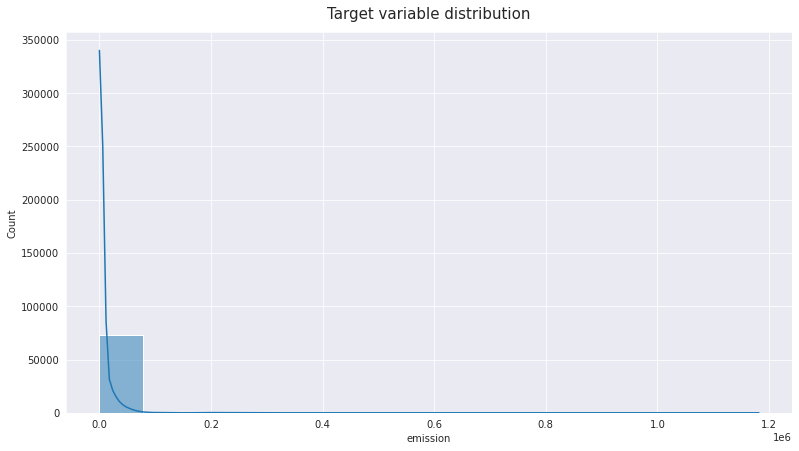

None

17.038027449698163

In [14]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

In [15]:
train.emission = np.log(train.emission)
train.emission.skew()

-0.4685478820791871

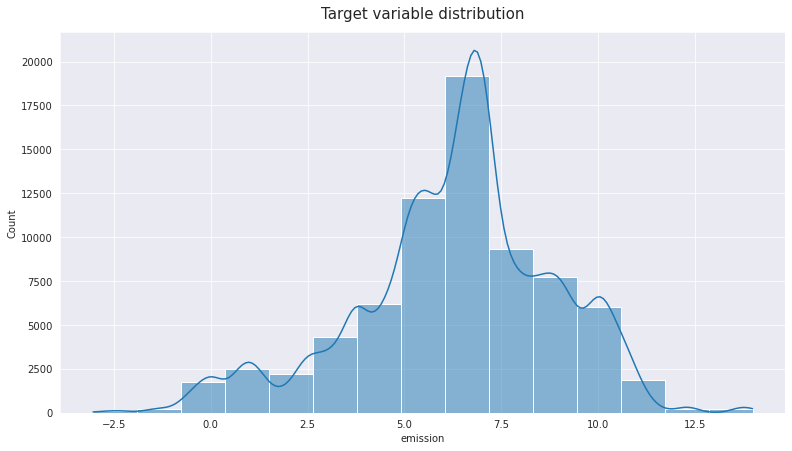

None

-0.4685478820791871

In [16]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

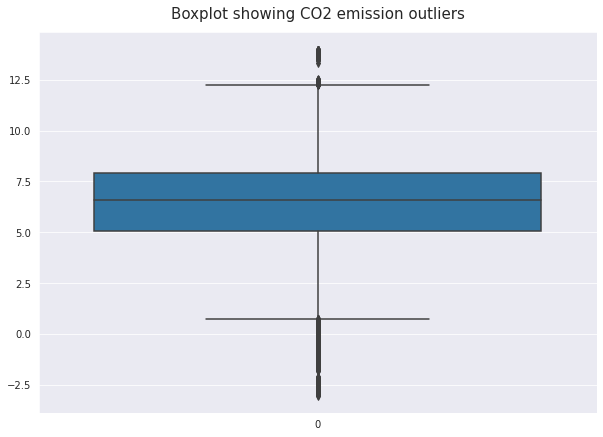

In [17]:
# Plotting boxplot for the CO2 emissions
sns.set_style('darkgrid')
plt.figure(figsize = (10, 7))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

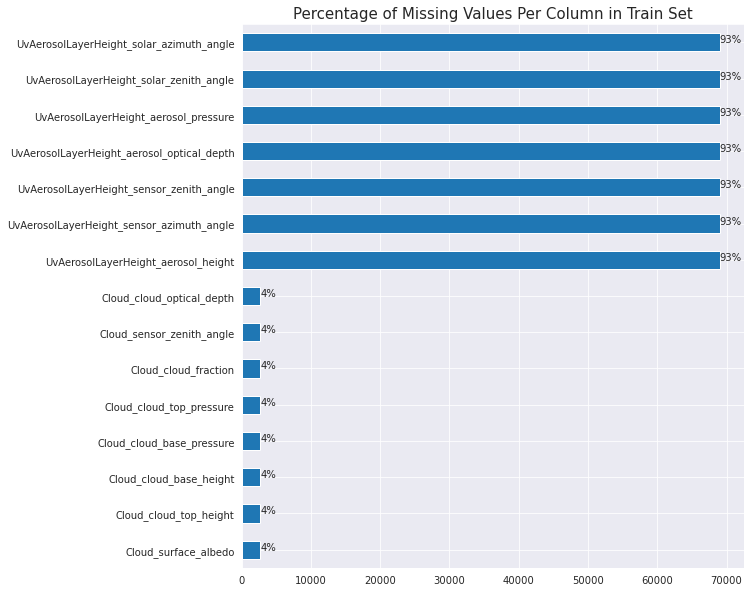

In [18]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [19]:
null_df = train.isna().sum().sort_values(ascending=False)
null_features = null_df[null_df > 30000].index.to_list()

print(len(null_features))
print(null_features)

7
['UvAerosolLayerHeight_solar_azimuth_angle', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_aerosol_height']


In [20]:
# drop colls with large # of null values
train.drop(null_features,inplace=True,axis=1)
test.drop(null_features,inplace=True,axis=1)

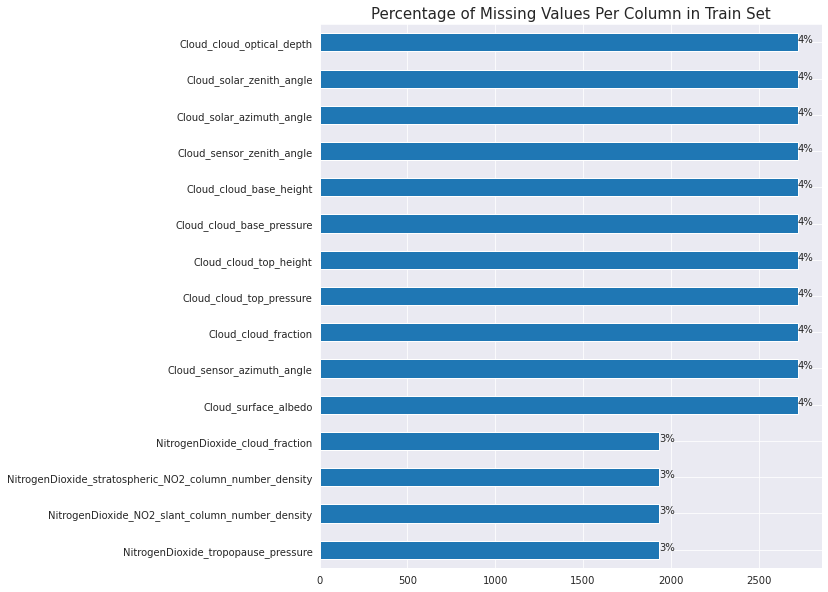

In [21]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [22]:
# Drop target from test column
p=[]
l=list(test.columns)
l.append('target')
for c in list(train.columns):
  if c not in l:
    p.append(c)
    train.drop(c,inplace=True,axis=1)

In [23]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [24]:
test=test.drop(columns=[
    'SulphurDioxide_sensor_azimuth_angle',
    'SulphurDioxide_sensor_zenith_angle',
    'SulphurDioxide_solar_azimuth_angle',
    'SulphurDioxide_solar_zenith_angle'
])
train=train.drop(columns=[
    'SulphurDioxide_sensor_azimuth_angle',
    'SulphurDioxide_sensor_zenith_angle',
    'SulphurDioxide_solar_azimuth_angle',
    'SulphurDioxide_solar_zenith_angle'
 ])


test=test.drop(columns=[
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle',
    'CarbonMonoxide_solar_azimuth_angle',
    'CarbonMonoxide_solar_zenith_angle',
    'CarbonMonoxide_sensor_altitude'
])
train=train.drop(columns=[
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle',
    'CarbonMonoxide_solar_azimuth_angle',
    'CarbonMonoxide_solar_zenith_angle',
    'CarbonMonoxide_sensor_altitude'
 ])

test=test.drop(columns=[
    'NitrogenDioxide_sensor_azimuth_angle',
    'NitrogenDioxide_sensor_zenith_angle',
    'NitrogenDioxide_solar_azimuth_angle',
    'NitrogenDioxide_solar_zenith_angle',
    'NitrogenDioxide_sensor_altitude'
])
train=train.drop(columns=[
    'NitrogenDioxide_sensor_azimuth_angle',
    'NitrogenDioxide_sensor_zenith_angle',
    'NitrogenDioxide_solar_azimuth_angle',
    'NitrogenDioxide_solar_zenith_angle',
    'NitrogenDioxide_sensor_altitude'
 ])

test=test.drop(columns=[
    'Formaldehyde_solar_zenith_angle',
    'Formaldehyde_solar_azimuth_angle',
    'Formaldehyde_sensor_zenith_angle',
    'Formaldehyde_sensor_azimuth_angle'
])
train=train.drop(columns=[
    'Formaldehyde_solar_zenith_angle',
    'Formaldehyde_solar_azimuth_angle',
    'Formaldehyde_sensor_zenith_angle',
    'Formaldehyde_sensor_azimuth_angle'
 ])

test=test.drop(columns=[
'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle'
])
train=train.drop(columns=[
'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle'
 ])

test=test.drop(columns=[
'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle'
])
train=train.drop(columns=[
'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle'
 ])


test=test.drop(columns=[
'Cloud_sensor_azimuth_angle',
       'Cloud_sensor_zenith_angle', 'Cloud_solar_azimuth_angle',
       'Cloud_solar_zenith_angle'
])
train=train.drop(columns=[
'Cloud_sensor_azimuth_angle',
       'Cloud_sensor_zenith_angle', 'Cloud_solar_azimuth_angle',
       'Cloud_solar_zenith_angle'
 ])

In [25]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [26]:
result_train=missing_zero_values_table(train)

Your selected dataframe has 38 columns and 74005 Rows.
There are 33 columns that have missing values.


In [27]:
trainag=train.copy()
testag=test.copy()

In [28]:
# drop non numeric cols
num = []
non = []
for col in train.select_dtypes(include=['int64', 'float64']):
    num.append(col)

for col in train:
    if col not in num:
        non.append(col)
        
non

train.drop(non,inplace=True,axis=1)
test.drop(non,inplace=True,axis=1)

In [29]:
for i in train.columns.values:
    train[i].fillna((train[i].mean()), inplace=True)
    
for i in test.columns.values:
    test[i].fillna((test[i].mean()), inplace=True)

In [30]:
result_train=missing_zero_values_table(train)

Your selected dataframe has 37 columns and 74005 Rows.
There are 0 columns that have missing values.


## Simple PCA

In [31]:
from sklearn.preprocessing import StandardScaler

# performing standardization
sc = StandardScaler()
train_scaled = sc.fit_transform(train)
test_scaled = sc.fit_transform(test)

# apply PCA to the features using the PCA class in the sklearn.decomposition module

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(train_scaled)
pca.fit(test_scaled)

PCA()

In [32]:
# print the explained variances

'''
So how do you interpret the output? You can interpret it as follows:

The first component alone captures about 44% variability in the data
The second one captures about 19% variability in the data and so on.
The 30 components altogether capture 100% variability in the data.

'''

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# A much easier way to understand the above result is to print the cumulative variances
'''
You can now interpret the cumulative variances as follows:

The first component alone captures about 44% variability in the data
The first two components capture about 63% variability in the data and so on.
The first 8 components together capture about 92.6% variability in the data.
'''

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[1.75656339e+01 1.22717100e+01 1.13396258e+01 8.54954715e+00
 6.85110317e+00 5.48632538e+00 5.13415546e+00 4.55185929e+00
 4.04442469e+00 3.66023771e+00 2.65455757e+00 2.16665277e+00
 1.93240128e+00 1.81731641e+00 1.47056594e+00 1.41119219e+00
 1.18601073e+00 1.14862966e+00 1.05739529e+00 1.00404179e+00
 8.40058584e-01 7.27593321e-01 6.60263995e-01 5.34616586e-01
 4.55728999e-01 4.41232256e-01 3.69874859e-01 2.06491214e-01
 1.31909528e-01 1.05721478e-01 9.84554712e-02 7.08456841e-02
 3.28401006e-02 1.16713350e-02 5.32848820e-03 2.66338281e-03
 1.31847707e-03]

Cumulative Variances (Percentage):
[ 17.56563391  29.83734394  41.17696976  49.7265169   56.57762007
  62.06394545  67.19810091  71.74996021  75.79438489  79.45462261
  82.10918018  84.27583295  86.20823423  88.02555064  89.49611658
  90.90730877  92.09331949  93.24194916  94.29934445  95.30338624
  96.14344483  96.87103815  97.53130214  98.06591873  98.52164773
  98.96287998  99.33275484  99.53924606  99.

In [33]:
from matplotlib import pyplot as plt
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

Cumulative Variances (Percentage):
[17.04366465 28.09668947 37.81477517 45.57083127 52.6179611  58.77730584
 64.32141628 69.23046869 73.91354423 77.67393948 80.51539142 82.65262848
 84.67578034 86.52550517 88.1926014  89.69611566 91.12985846 92.41074463
 93.60084214 94.66293765 95.62836012]
Number of components: 21


Text(0, 0.5, 'Explained variance (%)')

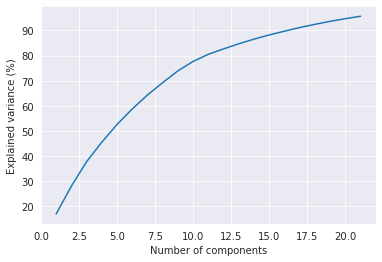

In [34]:
pca = PCA(n_components = 0.95)
pca.fit(train_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [35]:
# You can also find out the importance of each feature that contributes 
# to each of the components using the components_ attribute of the pca object
# The importance of each feature is reflected by the magnitude of the corresponding
# values in the output — the higher magnitude, the higher the importance

pca_components = abs(pca.components_)
print(pca_components)

[[7.83747428e-02 1.02604024e-03 2.51515203e-02 1.83172794e-02
  1.95582414e-01 2.71630473e-01 1.61436275e-01 3.76009741e-02
  1.30116856e-01 1.08464994e-02 2.65528825e-01 2.44299491e-01
  1.02485624e-01 1.27990250e-01 2.16694726e-01 1.63900628e-01
  1.22974130e-01 1.16869032e-01 1.58225942e-01 3.39792255e-03
  1.72004850e-01 1.91113711e-02 5.88092169e-02 9.46978427e-02
  7.56038745e-02 2.41989795e-02 2.82242493e-01 2.64642132e-01
  1.22157090e-01 2.32550687e-01 2.04766002e-01 2.19245794e-01
  2.14059006e-01 2.13915316e-01 2.09312015e-01 1.72338056e-01
  1.70706070e-01]
 [5.81462153e-02 6.15373445e-02 1.74329295e-01 1.85791249e-01
  1.31355921e-01 1.14748884e-01 1.27977744e-01 9.78856890e-02
  1.20993624e-01 1.27093705e-01 1.36214550e-01 5.73446623e-03
  1.58004667e-01 1.51872538e-01 2.63247954e-02 1.55367236e-01
  7.11249174e-02 2.01849404e-01 8.82917435e-02 5.40618444e-02
  1.48787736e-01 3.34723899e-02 7.67121927e-02 1.99624823e-01
  5.61460928e-02 1.47865888e-01 1.19254436e-02 7.105

In [36]:
# For curiosity, let’s print out the top 4 features that contributes the most to each of the 6 components
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Ozone_O3_column_number_density_amf', 'SulphurDioxide_SO2_column_number_density_amf', 'CarbonMonoxide_H2O_column_number_density', 'Ozone_O3_slant_column_number_density']
Component 1: ['Cloud_cloud_top_height', 'Cloud_cloud_top_pressure', 'Cloud_cloud_base_height', 'Cloud_cloud_base_pressure']
Component 2: ['NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'UvAerosolIndex_sensor_altitude', 'latitude']
Component 3: ['Formaldehyde_cloud_fraction', 'Ozone_cloud_fraction', 'NitrogenDioxide_cloud_fraction', 'SulphurDioxide_cloud_fraction']
Component 4: ['CarbonMonoxide_CO_column_number_density', 'Formaldehyde_cloud_fraction', 'week_no', 'Ozone_O3_column_number_density']
Component 5: ['UvAerosolIndex_sensor_altitude', 'latitude', 'SulphurDioxide_cloud_fraction', 'Formaldehyde_cloud_fraction']
Component 6: ['SulphurDioxide_SO2_column_number_density_15km', 'SulphurDioxide_SO2_slant

In [37]:
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)
print(train_pca.shape, test_pca.shape)

(74005, 21) (28085, 21)


In [38]:
feature=['SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 'Ozone_O3_column_number_density_amf', 'Ozone_O3_slant_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density', 'Formaldehyde_cloud_fraction', 'UvAerosolIndex_absorbing_aerosol_index', 'UvAerosolIndex_sensor_altitude', 'Ozone_O3_column_number_density', 'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction', 'Cloud_cloud_fraction', 'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height', 'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height', 'Cloud_cloud_optical_depth', 'Cloud_surface_albedo']

train1=train.copy()
test1=test.copy()
# for c in list(feature):
#     if c not in l:
#         train1.drop(c,inplace=True,axis=1)
#         test1.drop(c,inplace=True,axis=1)
    
pca = PCA(random_state=42,n_components=1)
train_pca = pca.fit_transform(train1)
train['pca_feature'] = train_pca[:,0]
test_pca = pca.transform(test1)
test['pca_feature'] = test_pca[:,0]

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## simple catboost

In [40]:

# perform a split
X_train, X_test, y_train, y_test = train_test_split(train_pca, target,
                     test_size=0.3,
                     shuffle=True, 
                     random_state=SEED)

In [41]:

first_model = cb.CatBoostRegressor(iterations=1000,
                             learning_rate=0.045,
                             depth=8,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=300)

# train the model using the PCA components
first_model.fit(train,target,
             use_best_model=True,
             verbose=50)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 50578.6207529	total: 91.9ms	remaining: 1m 31s
50:	learn: 12990.2654369	total: 1.63s	remaining: 30.4s
100:	learn: 8512.8266132	total: 3.38s	remaining: 30.1s
150:	learn: 6577.2497904	total: 4.91s	remaining: 27.6s
200:	learn: 5540.3221941	total: 6.28s	remaining: 25s
250:	learn: 4728.2065760	total: 7.53s	remaining: 22.5s
300:	learn: 4185.9540579	total: 8.81s	remaining: 20.5s
350:	learn: 3843.3832133	total: 10.1s	remaining: 18.7s
400:	learn: 3626.5667979	total: 11.5s	remaining: 17.2s
450:	learn: 3465.3590414	total: 13.1s	remaining: 15.9s
500:	learn: 3274.2516645	total: 14.7s	remaining: 14.6s
550:	learn: 3113.5011456	total: 16.5s	remaining: 13.5s
600:	learn: 2971.1364871	total: 18.1s	remaining: 12s
650:	learn: 2850.4216081	total: 19.8s	remaining: 10.6s
700:	learn: 2756.8613671	total: 22.1s	remaining: 9.44s
750:	learn: 2670.5796628	total: 24.8s	remaining: 8.24s
800:	learn: 2592.1148199	total: 27.4s	remaining: 6.8s
850:	learn: 2498.4786316	total: 29.4s	remaining: 5.15s
900:	learn: 24

In [42]:
aggs = {}

aggs['SulphurDioxide_SO2_column_number_density'] = ['sum','max','min','mean']
aggs['SulphurDioxide_SO2_column_number_density_amf'] = ['sum','max','min','mean']
aggs['SulphurDioxide_SO2_column_number_density_15km'] = ['sum','max','min','mean']
aggs['CarbonMonoxide_CO_column_number_density'] = ['sum','max','min','mean']
aggs['CarbonMonoxide_H2O_column_number_density'] = ['sum','max','min','mean']
aggs['NitrogenDioxide_NO2_column_number_density'] = ['sum','max','min','mean']
aggs['NitrogenDioxide_tropospheric_NO2_column_number_density'] = ['sum','max','min','mean']
aggs['NitrogenDioxide_stratospheric_NO2_column_number_density'] = ['sum','max','min','mean']
aggs['NitrogenDioxide_NO2_slant_column_number_density'] = ['sum','max','min','mean']
aggs['Formaldehyde_tropospheric_HCHO_column_number_density'] = ['sum','max','min','mean']
aggs['Formaldehyde_tropospheric_HCHO_column_number_density_amf'] = ['sum','max','min','mean']
aggs['Ozone_O3_column_number_density_amf'] = ['sum','max','min','mean']
aggs['Ozone_O3_slant_column_number_density'] = ['sum','max','min','mean']
aggs['Formaldehyde_HCHO_slant_column_number_density'] = ['sum','max','min','mean']
aggs['Formaldehyde_cloud_fraction'] = ['sum','max','min','mean']
aggs['UvAerosolIndex_absorbing_aerosol_index'] = ['sum','max','min','mean']
aggs['UvAerosolIndex_sensor_altitude'] = ['sum','max','min','mean']
aggs['Ozone_O3_column_number_density'] = ['sum','max','min','mean']
aggs['Ozone_O3_column_number_density_amf'] = ['sum','max','min','mean']
aggs['Ozone_O3_slant_column_number_density'] = ['sum','max','min','mean']
aggs['Ozone_O3_effective_temperature'] = ['sum','max','min','mean']
aggs['Ozone_cloud_fraction'] = ['sum','max','min','mean']
aggs['Cloud_cloud_fraction'] = ['sum','max','min','mean']
aggs['Cloud_cloud_top_pressure'] = ['sum','max','min','mean']
aggs['Cloud_cloud_top_height'] = ['sum','max','min','mean']
aggs['Cloud_cloud_base_pressure'] = ['sum','max','min','mean']

aggs['Cloud_cloud_base_height'] = ['sum','max','min','mean']
aggs['Cloud_cloud_optical_depth'] = ['sum','max','min','mean']
aggs['Cloud_surface_albedo'] = ['sum','max','min','mean']

In [43]:
trainag

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_SO2_column_number_density_15km,...,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,0.000033,...,0.340750,226.969563,0.544172,0.392759,47991.296016,5566.222019,54826.032616,4606.209995,19.115282,0.353778
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,-0.000067,...,0.299359,228.693974,0.384905,0.418427,61615.924069,3711.511365,68491.753342,3034.461661,12.218664,0.244987
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-0.000031,...,0.289392,229.691830,0.460520,0.293482,73062.540440,2136.385189,78967.739548,1433.482587,6.062737,0.245102
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,0.000031,...,0.363093,227.465124,0.076428,0.037799,57079.903301,3841.853018,64592.806769,2878.512917,6.388233,0.210904
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,0.000005,...,0.315427,232.261931,0.345187,0.341352,79602.445312,1295.688171,86804.025391,1094.665344,9.206252,0.261103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74000,ID_-33.93_25.67_2022_45,-33.93,25.67,2022,45,0.001192,0.322510,0.000358,0.113889,0.000157,...,0.412579,226.449177,0.388214,0.925229,47593.009061,6380.936608,54160.486756,5380.936607,32.711150,0.088256
74001,ID_-33.93_25.67_2022_46,-33.93,25.67,2022,46,0.000196,0.393484,0.000081,0.095715,0.000039,...,0.354479,230.366024,0.097649,0.178863,49600.699872,6080.303261,56345.002370,5080.302846,5.022155,0.030810
74002,ID_-33.93_25.67_2022_47,-33.93,25.67,2022,47,0.000114,0.445499,0.000054,0.007275,0.000024,...,0.414909,229.726058,0.098036,0.171674,85511.199840,1478.970433,95206.933265,517.846957,4.096226,0.080515
74003,ID_-33.93_25.67_2022_48,-33.93,25.67,2022,48,0.000092,0.377850,0.000035,0.077744,0.000013,...,0.398473,227.381164,0.080037,0.157674,83253.679687,1722.604370,88203.562500,1166.031128,9.418262,0.113354


In [44]:
agg_trans = trainag.groupby(['ID_LAT_LON_YEAR_WEEK']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)

df = (trainag.groupby('ID_LAT_LON_YEAR_WEEK')
          .size()
          .reset_index(name='{}transactions_count'.format('1')))

agg_trans = pd.merge(df, agg_trans, on='ID_LAT_LON_YEAR_WEEK', how='left')
trainag = pd.merge(trainag,agg_trans, on='ID_LAT_LON_YEAR_WEEK', how='left')
trainag.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_SO2_column_number_density_15km,...,Cloud_cloud_base_height_min,Cloud_cloud_base_height_mean,Cloud_cloud_optical_depth_sum,Cloud_cloud_optical_depth_max,Cloud_cloud_optical_depth_min,Cloud_cloud_optical_depth_mean,Cloud_surface_albedo_sum,Cloud_surface_albedo_max,Cloud_surface_albedo_min,Cloud_surface_albedo_mean
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,0.000033,...,4606.209995,4606.209995,19.115282,19.115282,19.115282,19.115282,0.353778,0.353778,0.353778,0.353778
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,-0.000067,...,3034.461661,3034.461661,12.218664,12.218664,12.218664,12.218664,0.244987,0.244987,0.244987,0.244987
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-0.000031,...,1433.482587,1433.482587,6.062737,6.062737,6.062737,6.062737,0.245102,0.245102,0.245102,0.245102
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,0.000031,...,2878.512917,2878.512917,6.388233,6.388233,6.388233,6.388233,0.210904,0.210904,0.210904,0.210904
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,0.000005,...,1094.665344,1094.665344,9.206252,9.206252,9.206252,9.206252,0.261103,0.261103,0.261103,0.261103


In [45]:
agg_trans = testag.groupby(['ID_LAT_LON_YEAR_WEEK']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)

df = (testag.groupby('ID_LAT_LON_YEAR_WEEK')
          .size()
          .reset_index(name='{}transactions_count'.format('1')))

agg_trans = pd.merge(df, agg_trans, on='ID_LAT_LON_YEAR_WEEK', how='left')
testag = pd.merge(testag,agg_trans, on='ID_LAT_LON_YEAR_WEEK', how='left')
testag.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_SO2_column_number_density_15km,...,Cloud_cloud_base_height_min,Cloud_cloud_base_height_mean,Cloud_cloud_optical_depth_sum,Cloud_cloud_optical_depth_max,Cloud_cloud_optical_depth_min,Cloud_cloud_optical_depth_mean,Cloud_surface_albedo_sum,Cloud_surface_albedo_max,Cloud_surface_albedo_min,Cloud_surface_albedo_mean
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,0.000015,...,1562.031017,1562.031017,10.734123,10.734123,10.734123,10.734123,0.280660,0.280660,0.280660,0.280660
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,0.000181,0.423171,0.000062,0.075100,0.000024,...,927.111222,927.111222,5.250020,5.250020,5.250020,5.250020,0.238933,0.238933,0.238933,0.238933
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,0.000059,0.713085,0.000043,0.114210,0.000020,...,1006.778109,1006.778109,6.819371,6.819371,6.819371,6.819371,0.258681,0.258681,0.258681,0.258681
3,ID_-23.53_27.47_2019_4,-23.53,27.47,2019,4,0.000483,0.434454,0.000171,0.131394,0.000068,...,3428.423528,3428.423528,6.233628,6.233628,6.233628,6.233628,0.281542,0.281542,0.281542,0.281542
4,ID_-23.53_27.47_2019_5,-23.53,27.47,2019,5,0.000193,0.783044,0.000141,0.161142,0.000065,...,1122.534093,1122.534093,11.810251,11.810251,11.810251,11.810251,0.281564,0.281564,0.281564,0.281564


In [46]:
trainag.drop(['ID_LAT_LON_YEAR_WEEK'],inplace=True,axis=1)
testag.drop(['ID_LAT_LON_YEAR_WEEK'],inplace=True,axis=1)



In [47]:
for i in trainag.columns.values:
    trainag[i].fillna((trainag[i].mean()), inplace=True)
    
for i in testag.columns.values:
    testag[i].fillna((testag[i].mean()), inplace=True)

In [48]:
feature=['SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 'Ozone_O3_column_number_density_amf', 'Ozone_O3_slant_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density', 'Formaldehyde_cloud_fraction', 'UvAerosolIndex_absorbing_aerosol_index', 'UvAerosolIndex_sensor_altitude', 'Ozone_O3_column_number_density', 'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction', 'Cloud_cloud_fraction', 'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height', 'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height', 'Cloud_cloud_optical_depth', 'Cloud_surface_albedo']

train1=trainag.copy()
test1=testag.copy()
# for c in list(feature):
#     if c not in l:
#         train1.drop(c,inplace=True,axis=1)
#         test1.drop(c,inplace=True,axis=1)
    
pca = PCA(random_state=42,n_components=1)
train_pca = pca.fit_transform(train1)
trainag['pca_feature'] = train_pca[:,0]
test_pca = pca.transform(test1)
testag['pca_feature'] = test_pca[:,0]

## second catboost

In [49]:
import catboost as cb
from sklearn.model_selection import train_test_split

second_model = cb.CatBoostRegressor(iterations=1000,
                             learning_rate=0.045,
                             depth=8,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=300)

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
# model.grid_search(grid, train_dataset)
second_model.fit(trainag,target,
             use_best_model=True,
             verbose=50)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 50547.9315782	total: 108ms	remaining: 1m 47s
50:	learn: 12987.2061564	total: 5.16s	remaining: 1m 36s
100:	learn: 8933.6679087	total: 10.3s	remaining: 1m 31s
150:	learn: 7120.2236219	total: 15.7s	remaining: 1m 28s
200:	learn: 6000.9112902	total: 20.4s	remaining: 1m 21s
250:	learn: 5254.1287551	total: 25.2s	remaining: 1m 15s
300:	learn: 4530.1791001	total: 29.7s	remaining: 1m 8s
350:	learn: 4098.1352146	total: 34.4s	remaining: 1m 3s
400:	learn: 3848.4674999	total: 38.8s	remaining: 57.9s
450:	learn: 3580.7139745	total: 43.3s	remaining: 52.7s
500:	learn: 3380.8356556	total: 48.6s	remaining: 48.4s
550:	learn: 3250.0752262	total: 53.5s	remaining: 43.6s
600:	learn: 3137.7381770	total: 57.9s	remaining: 38.4s
650:	learn: 3014.0022843	total: 1m 2s	remaining: 33.4s
700:	learn: 2914.2720029	total: 1m 7s	remaining: 28.7s
750:	learn: 2812.5057543	total: 1m 13s	remaining: 24.3s
800:	learn: 2720.2678651	total: 1m 17s	remaining: 19.4s
850:	learn: 2628.0565987	total: 1m 22s	remaining: 14.4s
90

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [51]:
# pred = model.predict(X_test)
# rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# r2 = r2_score(y_test, pred)
# print("Testing performance")
# print('RMSE: {:.2f}'.format(rmse))
# print('R2: {:.2f}'.format(r2))

# # Testing performance
# # RMSE: 4196.16 //down
# # R2: 0.99 // up
# # 10525.10522

In [52]:
sorted_feature_importance = first_model.feature_importances_.argsort()

feature_names = list()
for i in sorted_feature_importance:
    feature_names.append(trainag.columns[i])
#     print(i)
print(f'features sorted by importance: {feature_names}')

features sorted by importance: ['Cloud_cloud_top_pressure', 'Formaldehyde_HCHO_slant_column_number_density', 'Cloud_cloud_base_pressure', '1transactions_count', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Cloud_cloud_base_height', 'Ozone_O3_effective_temperature', 'Formaldehyde_cloud_fraction', 'SulphurDioxide_SO2_column_number_density', 'Ozone_O3_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'Cloud_cloud_optical_depth', 'CarbonMonoxide_CO_column_number_density', 'SulphurDioxide_SO2_column_number_density_15km', 'Cloud_cloud_top_height', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 'Ozone_O3_column_number_density', 'SulphurDioxide_cloud_fraction', 'Ozone_cloud_fraction', 'SulphurDioxide_SO2_slant_column_number_density', 'UvAerosolIndex_absorbing_aerosol_index', 'Cloud_cloud_fraction', 'NitrogenDioxide_absorbing_aerosol_index', 'CarbonMonoxide_cloud_height', 'Ozone_O3_column_number_density_amf', 'NitrogenDioxide_cloud_fraction', 'Nitroge

In [53]:
len(feature_names)

38

In [54]:
# non important features
non = []
for col in train.columns:
    if col not in feature_names:
        non.append(col)
        
print(non)

['pca_feature']


Text(0.5, 0, 'CatBoost Feature Importance')

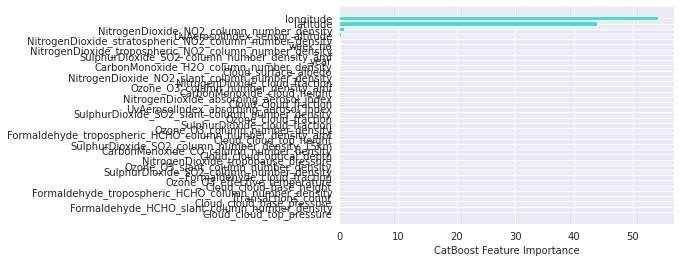

In [55]:
from matplotlib import pyplot as plt

plt.barh(feature_names, 
        first_model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [56]:
import shap

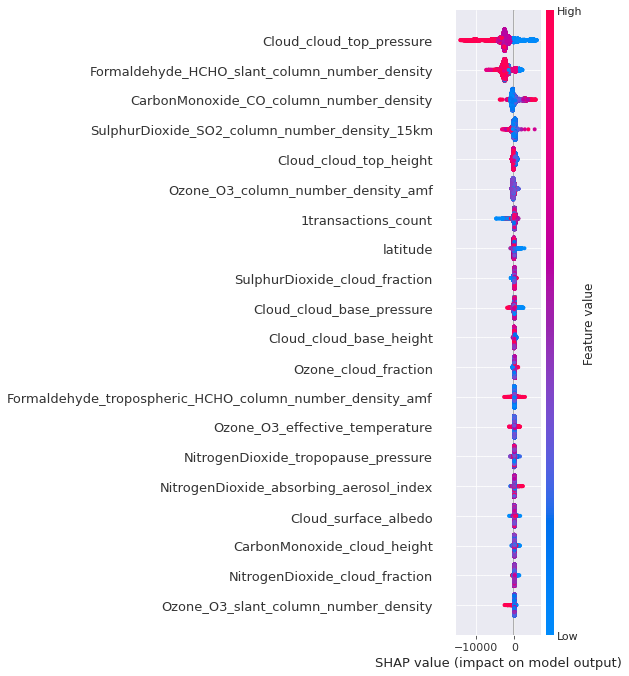

In [57]:
explainer = shap.TreeExplainer(first_model)
shap_values = explainer.shap_values(test)

shap.summary_plot(shap_values, test, feature_names = feature_names)

In [58]:
train.head(1)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,pca_feature
0,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,0.000033,0.023408,...,226.969563,0.544172,0.392759,47991.296016,5566.222019,54826.032616,4606.209995,19.115282,0.353778,28114.760481


## Making Prediction

In [59]:
first_pred = first_model.predict(test)
second_pred = second_model.predict(testag)

In [60]:
x=(first_pred*0.4+second_pred*0.6)

In [65]:
# Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': testID, 'emission': x})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,2207.633065
1,ID_-23.53_27.47_2019_2,1213.722589
2,ID_-23.53_27.47_2019_3,2264.681563
3,ID_-23.53_27.47_2019_4,2421.205450
4,ID_-23.53_27.47_2019_5,11212.121459


In [66]:
sub_file.to_csv('submission.csv', index = False)